In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import sys
print(sys.version)
sys.path.append('../')

from models.powertrain.bounded_powertrain import Bounded_powertrain
from models.kinematic.ideal_diff_drive import Ideal_diff_drive
from models.kinematic.ICR_based import *
from models.kinematic.Perturbed_unicycle import *
from models.kinematic.enhanced_kinematic import *

3.10.6 (main, Nov 14 2022, 16:10:14) [GCC 11.3.0]


In [12]:
raw_dataset = pd.read_pickle('/home/dominic/repos/norlab_WMRD/data/marmotte/grand_salon_20_01_a/grand_salon_01_20_a_data_raw.pkl')

print(raw_dataset.columns)

Index(['ros_time', 'joy_switch', 'icp_index', 'calib_state', 'calib_step',
       'meas_left_vel', 'meas_right_vel', 'cmd_vel_x', 'cmd_vel_omega',
       'icp_pos_x', 'icp_pos_y', 'icp_pos_z', 'icp_quat_x', 'icp_quat_y',
       'icp_quat_z', 'icp_quat_w', 'imu_x', 'imu_y', 'imu_z'],
      dtype='object')


In [14]:
print(raw_dataset['icp_pos_x'].to_numpy().astype(float))

[0.         0.         0.         ... 5.83612728 5.83612728 5.83612728]


-0.41347402334213257
5.655601978302002


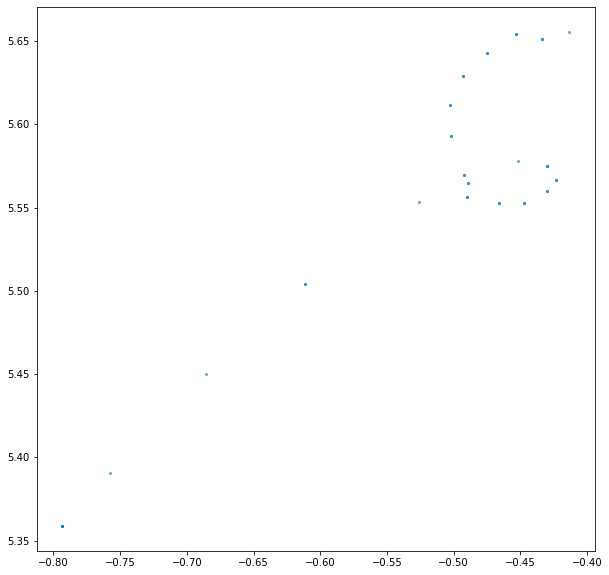

In [21]:
# plot model errors

start_window = 25034
end_window = start_window + 40

plt.figure(figsize=(10,10))
ax = plt.gca()
fig = plt.gcf()

line_width = 5
alpha = 0.2

alpha_plot = 0.6

idd = ax.scatter(raw_dataset['icp_pos_x'].to_numpy().astype(float)[start_window:end_window], raw_dataset['icp_pos_y'].to_numpy().astype(float)[start_window:end_window], 
                  c = 'C0', 
                  cmap = 'hot', 
                  alpha = alpha_plot, 
                  lw=0, 
                  s=10,
                  label='Body vel commands',
                 rasterized=True)

# print(raw_dataset['cmd_vel_x'].to_numpy().astype(float)[start_window:end_window])
# print(raw_dataset['cmd_vel_omega'].to_numpy().astype(float)[start_window:end_window])

print(raw_dataset['icp_pos_x'].to_numpy().astype(float)[end_window])
print(raw_dataset['icp_pos_y'].to_numpy().astype(float)[end_window])